# Notebook Description

In [55]:
import numpy as np
from sklearn import preprocessing
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt


# Benchmark Datasets

## 1_box_benchmark.csv (size  36297)

* 10_box_benchmark.csv (size  356911)
* CSV grid format ( row = data point, column = point feature )
* Includes missing sediment thickness imputated with 0







In [56]:
data = pd.read_csv('/content/1_box_benchmark.csv')
data.count()

Unnamed: 0              36297
Longitude               36297
Latitude                36297
EMAG2v3                 36297
igrf_dec                36297
interpolated_bouguer    36297
cm_curie_point_depth    36297
wgm2012_freeair_ponc    36297
rayleigh_group          36297
gl_elevation            36297
love_phase              36297
sc_crust_den            36297
dtype: int64

# Random Forest Regression
A basic random forest model where n estimators, regression trees, are randomly assigned subsets of data and predictors to use as splitting criteria, minimixing variance.

PCA (Principle Component Analysis) was experimented with but was ineffective. This is most likely due to random forest handling collinearity well. Collinearity is how PCA is able to reduce dimensions so intuitively not needed.

Standard training method of a scikit-learn estimator

In [57]:
# Columns to exclude
exclude_columns = ['Longitude', 'Latitude', 'EMAG2v3']

# Select columns not in exclude_columns using boolean indexing
X = data.loc[:, ~data.columns.isin(exclude_columns)]

X = X.fillna(X.median())

# Normalize the features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

y = data['EMAG2v3']

y = y.fillna(y.median())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


# Model Evaluation

This section explains the key metrics used to evaluate the performance of a regression model.

In [58]:
def evaluate_model(y_test, y_pred):
  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")  # Measures the average squared difference between predicted and actual values

  # Calculate R-squared (R²)
  r2 = r2_score(y_test, y_pred)
  print(f"R² Score: {r2}")  # Represents the proportion of the variance in the dependent variable that is predictable from the independent variables

  # Calculate Root Mean Squared Error (RMSE)
  rmse = np.sqrt(mse)
  print(f"Root Mean Squared Error: {rmse}")  # Provides an absolute measure of fit by taking the square root of MSE

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error: {mae}")  # Measures the average magnitude of the errors in a set of predictions, without considering their direction

  # Calculate the standard deviation of the target variable in the test set
  std_dev = np.std(y_test)

  # Calculate Coefficient of Variation of RMSE (CV(RMSE))
  cv_rmse = rmse / std_dev
  print(f"Coefficient of Variation of RMSE: {cv_rmse}")  # Normalizes RMSE by dividing it by the standard deviation of the target variable

evaluate_model(y_test, y_pred)

Mean Squared Error: 3698.262507041346
R² Score: 0.8499673466604034
Root Mean Squared Error: 60.813341521752825
Mean Absolute Error: 41.11493823797806
Coefficient of Variation of RMSE: 0.3873404876069588


## Plotting Comparisons



### Scatter Plot Analysis


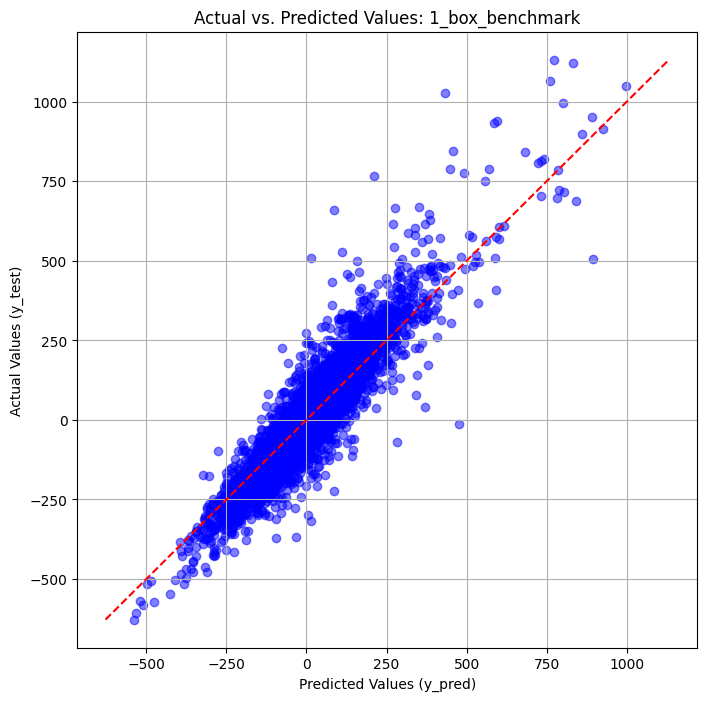

In [59]:

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test, alpha=0.5, color='b')
# Plot a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')

# Add labels and title
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.title('Actual vs. Predicted Values: 1_box_benchmark')

# Show the plot
plt.grid(True)
plt.show()




---

